IMPORT LIBRARY

In [9]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

READ DATASET

In [10]:
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

print(df)

       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0       

EKSPLORASI DATA

In [11]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [12]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [14]:
df.Class.value_counts()

Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64

SPLITING DATA

In [15]:
x = df.iloc[:, :-1]
y = df.iloc[:, [-1]]

In [16]:
x

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359


In [17]:
y

,Class
0,Çerçevelik
1,Çerçevelik
2,Çerçevelik
3,Çerçevelik
4,Çerçevelik
...,...
2495,Ürgüp Sivrisi
2496,Ürgüp Sivrisi
2497,Ürgüp Sivrisi
2498,Ürgüp Sivrisi


FEATURE SCALING

In [18]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [19]:
x

array([[-1.78470346, -2.21575484, -2.32022415, ...,  1.8737626 ,
        -1.77506344,  2.19727996],
       [-0.29478016, -0.56880361, -0.70091635, ...,  0.93837685,
        -0.82486401,  0.84023019],
       [-0.66135033, -0.43294002, -0.36939513, ..., -0.43161453,
         0.07405883, -0.21148339],
       ...,
       [ 0.53695644,  0.7326892 ,  0.90028724, ..., -0.65517709,
         0.76312751, -0.83346454],
       [-0.04737457,  0.48215494,  0.8057821 , ..., -1.30619127,
         1.29646729, -1.28581446],
       [ 0.31297387,  0.27147071,  0.11193101, ...,  0.0316071 ,
        -0.21587543,  0.1183551 ]])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size= 0.9, random_state=0)

In [21]:
print("X_train :", (len(x_train)))
print("X_test :", (len(x_test)))
print("Y_train :", (len(y_train)))
print("Y_test :", (len(y_test)))

X_train : 250
X_test : 2250
Y_train : 250
Y_test : 2250


MEMBUAT MODEL RANDOM FOREST

In [22]:
# Membuat model Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=0)

# Latih model dengan data latih
rf.fit(x_train, y_train)


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200, random_state=0)

PREDIKSI

In [23]:
y_pred = rf.predict(x_test)

In [24]:
y_pred

array(['Çerçevelik', 'Ürgüp Sivrisi', 'Çerçevelik', ..., 'Ürgüp Sivrisi',
       'Çerçevelik', 'Çerçevelik'], dtype=object)

EVALUASI MODEL

In [25]:
# Cetak Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Cetak Classification Report
print(classification_report(y_test, y_pred))

# Cetak Akurasi
print(f"Hasil Akurasinya : {accuracy_score(y_test, y_pred):.2f}")


[[1096   86]
 [ 218  850]]
               precision    recall  f1-score   support

   Çerçevelik       0.83      0.93      0.88      1182
Ürgüp Sivrisi       0.91      0.80      0.85      1068

     accuracy                           0.86      2250
    macro avg       0.87      0.86      0.86      2250
 weighted avg       0.87      0.86      0.86      2250

Hasil Akurasinya : 0.86


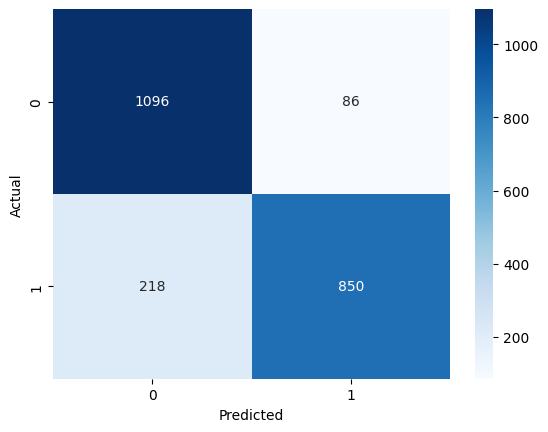

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


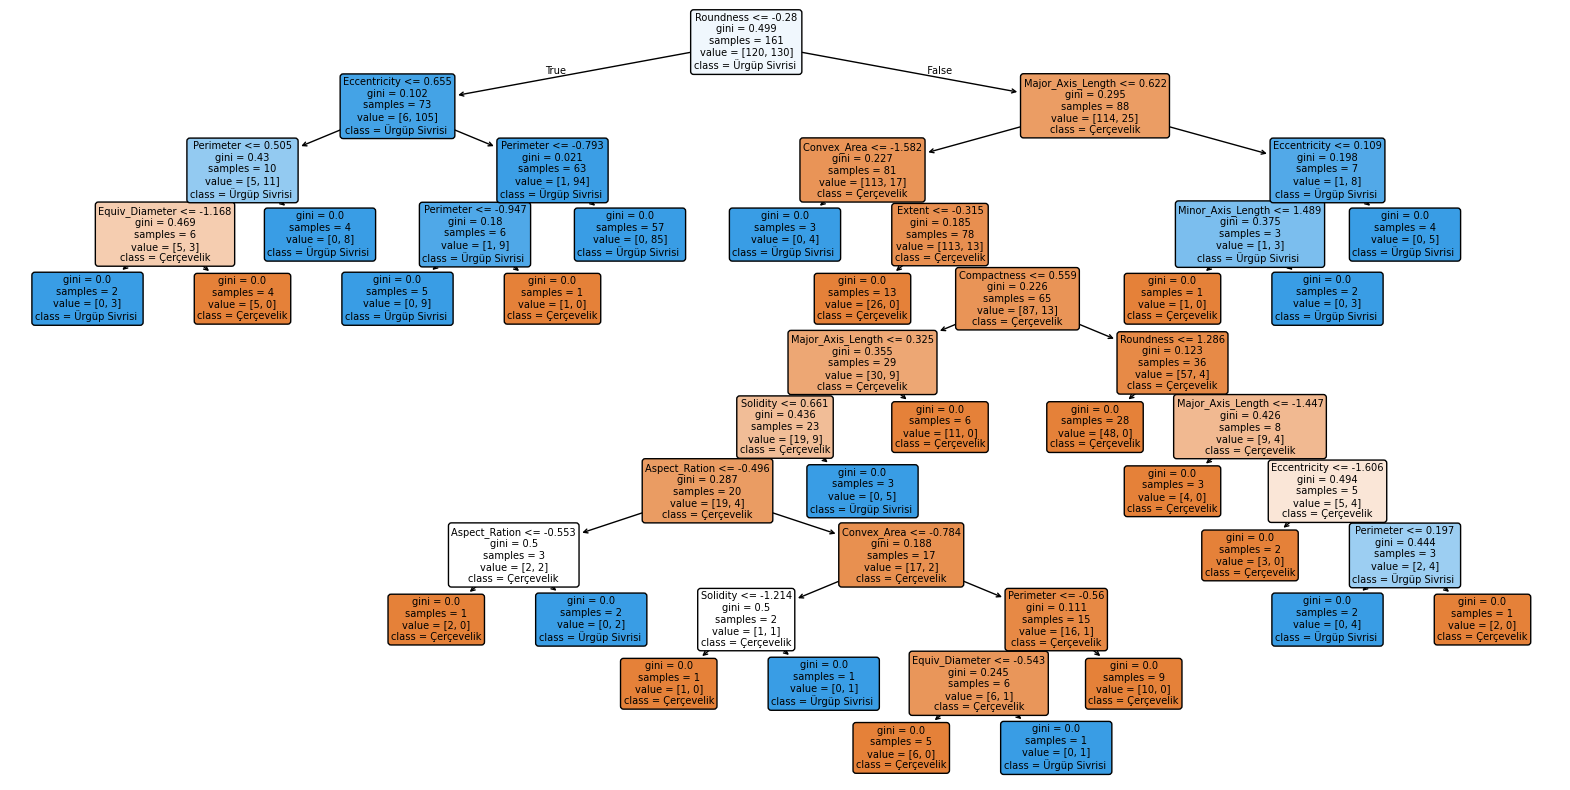

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualisasikan pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0],  # Ambil pohon pertama dari Random Forest
          filled=True,  # Mewarnai node dengan kelas yang diprediksi
          feature_names=df.columns,  # Nama fitur (misalnya df.columns)
          class_names=[
              'Çerçevelik', 'Ürgüp Sivrisi '
          ],  # Nama kelas target (nama spesies ikan)
          rounded=True)  # Membuat sudut node membulat
plt.show()


KLASIFIKASI DATA BARU

In [29]:
#Klasifikasi Data Baru

new_data = [[ 56276,	888.242,	326.1485,	220.2388	,56831	,267.6805,	0.7376,	0.9902,	0.7453,	0.8963,	1.4809,	0.8207]]
new_data_scaler = sc.transform(new_data)
pred = rf.predict(new_data_scaler)

print("Data Baru adalah : ", pred)

Data Baru adalah :  ['Ürgüp Sivrisi']


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SAVE MODEL

In [30]:
import pickle

# Simpan scaler
with open('scaler_rf_pumpkin.sav', 'wb') as file:
    pickle.dump(sc, file)

# Simpan model
with open('rf_model_pumpkin.sav', 'wb') as file:
    pickle.dump(rf, file)

# Load the model
with open('rf_model_pumpkin.sav', 'rb') as file:
    loaded_model = pickle.load(file)
with open('scaler_rf_pumpkin.sav', 'rb') as file:
    loaded_scaler = pickle.load(file)